# Landscape Setup

In this demo, we will generate a landscape on a ring Euclidean geometry and optimize it over a continuous space.

## Loading Libraries and Paths

In [ ]:
# Fix PROJ path
import os; os.environ['PROJ_LIB']='/path/to/env/share/proj'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MGSurvE as srv
%matplotlib inline
# Setup path and ID
(ID, OUT_PTH) = ('landscape_setup', '../out/')
srv.makeFolder(OUT_PTH)

## Dwells, Traps and Mosquito Movement

The two main elements in our MGSurvE landscapes are traps and dwells. In this example, we will lay down mosquito habitats in a ring with given inner and outer radii, then optimize the position of two different types of traps simultaneously.

### Habitats

To lay down our habitats in a Euclidean space we need to generate a pandas dataframe with three columns: 
* `'x'`: list of point coordinates along our first axis
* `'y'`: list of point coordinates along our second axis
* `'t'`: dwell type (all set to `0` for this example)

In [ ]:
PTS_NUM = 150
RADII = (75, 100)
# Generate pointset
xy = srv.ptsDonut(PTS_NUM, RADII).T
# Re-shape pointset into dataframe
points = pd.DataFrame({
    'x': xy[0], 'y': xy[1], 
    't': [0]*len(xy[0])
})

### Traps

For our traps we also need a pandas dataframe, this time containing the following columns:
* `'x'`: list of point coordinates along our first axis (for continuous optimization)
* `'y'`: list of point coordinates along our second axis (for continuous optimization)
* `'sid'`: id of the dwell in which the trap is located (for discrete optimization)
* `'t'`: trap type kernel id (as set in trap kernel dictionary)
* `'f'`: boolean to mark a trap as immovable (`False` or `0` leaves the trap as optimizable)

In [ ]:
nullTraps = [0, 0, 0, 0]
traps = pd.DataFrame({
    'x': nullTraps, 'y': nullTraps, 'sid': nullTraps,
    't': [0, 0, 1, 1], 
    'f': [0, 0, 0, 0]
})

Additionally, we need to define the attractiveness profile of our trap types in a dictionary in which the keys must match the types used in the `'t'` column of our dataframe. 

In [ ]:
tKer = {
    0: {'kernel': srv.exponentialDecay, 'params': {'A': .5, 'b': .1}},
    1: {'kernel': srv.exponentialDecay, 'params': {'A': .5, 'b': .125}}
}

### Mosquito Movement

In [ ]:
mKer = {
    'params': srv.MEDIUM_MOV_EXP_PARAMS, 
    'zeroInflation': .25
} 

## Landscape

In [17]:
lnd = srv.Landscape(
    points, 
    kernelParams=mKer,
    traps=traps, trapsKernels=tKer
)

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17f5f8c40>)

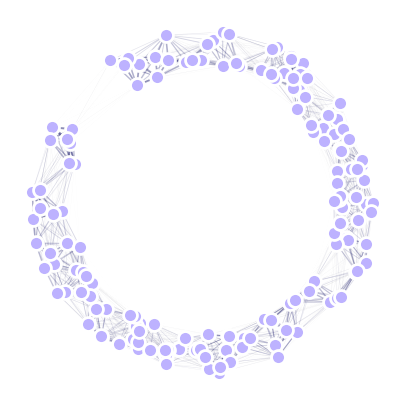

In [18]:
(fig, ax) = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
lnd.plotSites(fig, ax, size=100)
lnd.plotMaskedMigrationNetwork(fig, ax, alphaMin=.6, lineWidth=25)
srv.plotClean(fig, ax, frame=False)

## Quick Optimization

In [ ]:
GENS = 500
(lnd, logbook) = srv.optimizeTrapsGA(
    lnd, generations=GENS, 
    pop_size='auto', mating_params='auto', 
    mutation_params='auto', selection_params='auto',
)

In [ ]:
(fig, ax) = plt.subplots(1, 1, figsize=(15, 15), sharey=False)
lnd.plotSites(fig, ax, size=100)
# lnd.plotMaskedMigrationNetwork(fig, ax, alphaMin=.6, lineWidth=25)
lnd.plotTraps(fig, ax)
srv.plotClean(fig, ax, frame=False)
srv.plotFitness(fig, ax, min(logbook['min']))